# Let's build a neural network model that will recognize handwritten numbers

We have 10 classes (10 digits)

In [1]:
# import modules and libs
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

# Dense means that our layers will be fully connected

## Uploading and processing data (images)

### Uploading

Train sample size: 60000
Test sample size: 10000


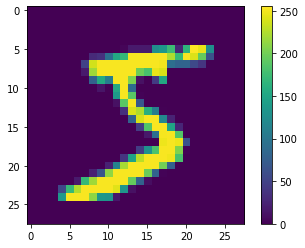

In [2]:
# divide the data into training and test samples
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'Train sample size: {x_train.shape[0]}')
print(f'Test sample size: {x_test.shape[0]}')

# let's see what our images look like
plt.imshow(x_train[0])
plt.colorbar()

### Processing

Normalize the data: for better network performance, divide the intensity of each pixel by 255 (so that it is in the range from 0 to 1)

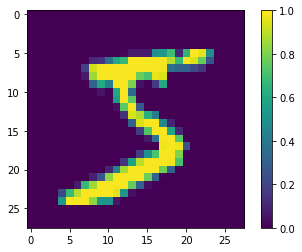

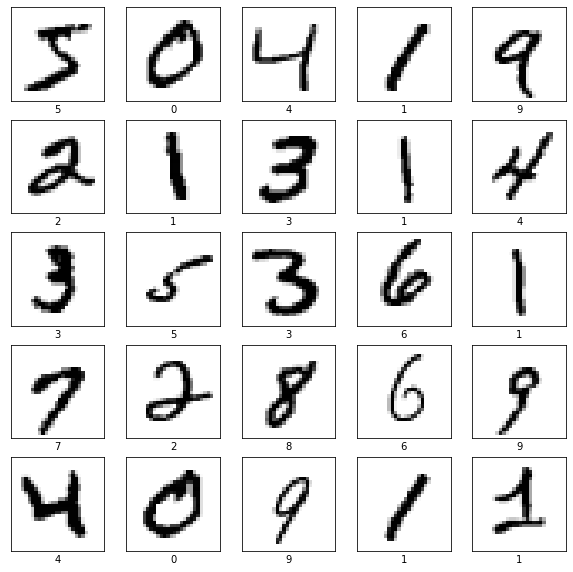

In [3]:
# Normalizing the data
x_train, x_test = x_train/255, x_test/255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


# Let's see how the images look after normalization
plt.imshow(x_train[0])
plt.colorbar()

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(y_train[i])

## Creating and setting up the neural network model

In [10]:
# create

# The first layer converts a two-dimensional array image into a string of pixels (one-dimensional array)
# On the last layer we have 10 neurons. Each means the probability that the image belongs to the corresponding class

model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28, 28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')
])


# setting up (compilation)

# As optimizer we will use SGD - stochastic gradient descent 
# As loss func crossentropy
# As quality func - the proportion of correct answers

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model Training and Checking

In [11]:
# train the model
model.fit(x_train, y_train_cat, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2579 - accuracy: 0.9261
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1160 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0800 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0589 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9856


In [12]:
# checking the accuracy of the model
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print('Test accuracy: ', test_accuracy)

313/313 [==============================] - 3s 6ms/step - loss: 0.0842 - accuracy: 0.9728
Test accuracy:  0.9728000164031982


## Predicting and checking on a test sample

In [13]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

# cheking the first 20 predictions
print('The first 20 predictions')
print(f'Preducted: {predictions[:20]}')
print(f'Real:      {y_test[:20]}')



313/313 [==============================] - 1s 2ms/step
The first 20 predictions
Preducted: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 8 4]
Real:      [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


## Let's look at model's mistakes

Test sample size: 10000
Amount of wrong predictions: 272
Model's prediction: 8


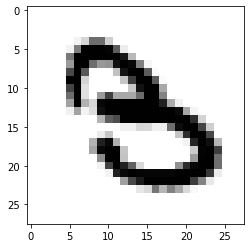

Model's prediction: 8


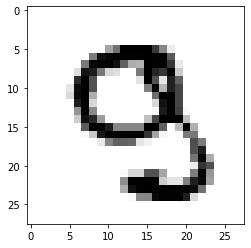

Model's prediction: 8


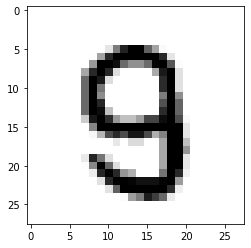

Model's prediction: 6


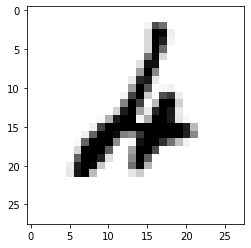

Model's prediction: 0


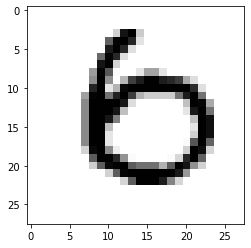

In [14]:
# making boolean array: is the prediction correct or not
mask = predictions == y_test

x_false = x_test[~mask]
y_false = predictions[~mask]

print(f'Test sample size: {x_test.shape[0]}')
print(f'Amount of wrong predictions: {x_false.shape[0]}')

# Viewing the first 5 incorrect results
for i in range(5):
  print(f"Model's prediction: {y_false[i]}")
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()